Importing the necessary libraries
-> We import string for the punctuations that we need to remove from the Review Text in order to clean it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import nltk

We download the stopwords package from the download_shell

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\kmohammed2\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
from nltk.corpus import stopwords

In [4]:
reviews=pd.read_csv('Womens_Clothing_E_Commerce_Reviews.csv')

In [5]:
reviews.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [6]:
reviews.shape

(23486, 11)

In [7]:
cols=[]
for i in reviews.columns:
    cols.append(i)

We drop the rows which have a null value for atleast one column

In [8]:
reviews.dropna(subset=cols,axis=0,inplace=True)

In [9]:
reviews.shape

(19662, 11)

In [10]:
len(reviews['Review Text'])

19662

In [11]:
def myfunc1(var):
    if (var<=3):
        return 'Bad'
    else:
        return 'Good'

In [12]:
reviews['Good/Bad']=reviews['Rating'].apply(lambda x: myfunc1(x))

In [13]:
reviews.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Good/Bad
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good


By using the 'bins' concept, we are categorizing the age groups into bins, which I have given a fixed number of 7 bins to be effectively classified into.

In [14]:
reviews['Age_bins']=pd.qcut(reviews['Age'],q=7)

In [15]:
reviews.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Good/Bad,Age_bins
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad,"(58.0, 99.0]"
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good,"(44.0, 50.0]"
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good,"(44.0, 50.0]"


In [16]:
Reviews=pd.DataFrame(reviews[['Good/Bad','Review Text','Age_bins','Recommended IND']],columns=['Good/Bad','Review Text','Age_bins','Recommended IND'])

In [17]:
Reviews.head()

,Good/Bad,Review Text,Age_bins,Recommended IND
2,Bad,I had such high hopes for this dress and reall...,"(58.0, 99.0]",0
3,Good,"I love, love, love this jumpsuit. it's fun, fl...","(44.0, 50.0]",1
4,Good,This shirt is very flattering to all due to th...,"(44.0, 50.0]",1
5,Bad,"I love tracy reese dresses, but this one is no...","(44.0, 50.0]",0
6,Good,I aded this in my basket at hte last mintue to...,"(35.0, 39.0]",1


In df1, we are aiming to display the total number of reviews given by specific age groups, followed by the constituent number of 'Good' and 'Bad' reviews.

In [18]:
df1=pd.DataFrame(Reviews.groupby('Age_bins').count()['Review Text'])

In [19]:
df1

,Review Text
Age_bins,
"(17.999, 31.0]",3283
"(31.0, 35.0]",2514
"(35.0, 39.0]",3051
"(39.0, 44.0]",2649
"(44.0, 50.0]",2853
"(50.0, 58.0]",2723
"(58.0, 99.0]",2589


In [20]:
lel=Reviews.groupby(['Age_bins','Good/Bad']).count()['Recommended IND']

In [21]:
lel

Age_bins        Good/Bad
(17.999, 31.0]  Bad          807
                Good        2476
(31.0, 35.0]    Bad          637
                Good        1877
(35.0, 39.0]    Bad          688
                Good        2363
(39.0, 44.0]    Bad          627
                Good        2022
(44.0, 50.0]    Bad          677
                Good        2176
(50.0, 58.0]    Bad          580
                Good        2143
(58.0, 99.0]    Bad          499
                Good        2090
Name: Recommended IND, dtype: int64

In [22]:
badbad=lel.xs('Bad',level='Good/Bad')

In [23]:
goodgood=lel.xs('Good',level='Good/Bad')

In [24]:
df1=pd.concat([df1,badbad],axis=1)

In [25]:
df1.rename(columns={'Recommended IND':'Bad'},inplace=True)

In [26]:
df1=pd.concat([df1,goodgood],axis=1)

In [27]:
df1.rename(columns={'Recommended IND':'Good'},inplace=True)

In [28]:
df1

,Review Text,Bad,Good
Age_bins,,,
"(17.999, 31.0]",3283,807,2476
"(31.0, 35.0]",2514,637,1877
"(35.0, 39.0]",3051,688,2363
"(39.0, 44.0]",2649,627,2022
"(44.0, 50.0]",2853,677,2176
"(50.0, 58.0]",2723,580,2143
"(58.0, 99.0]",2589,499,2090


<Axes: xlabel='Age_bins', ylabel='count'>

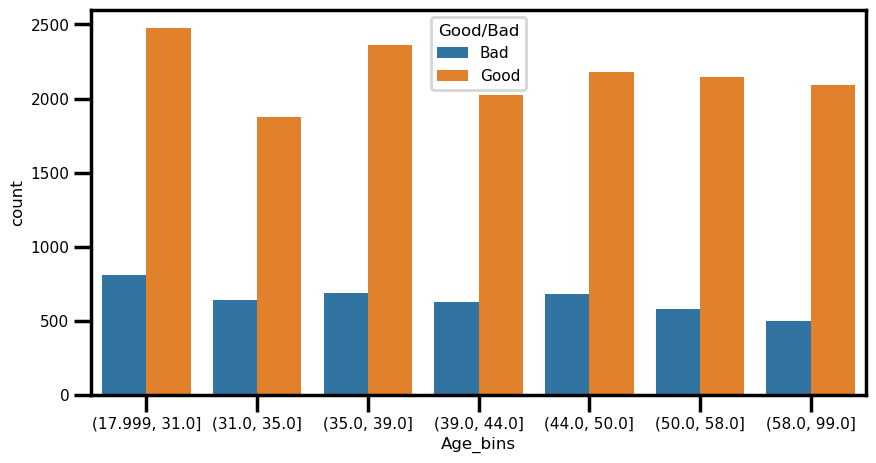

In [29]:
plt.figure(figsize=(10,5))
sns.set_context('poster',font_scale=0.5)
sns.countplot(x='Age_bins',hue='Good/Bad',data=Reviews)

In [30]:
#function to simplify the messages by removing the punctuations first and then the stopwords
def myfunc(punc):
    ml1=[]
    for i in punc:
        if i not in string.punctuation:
            ml1.append(i)
    ml2=''.join(ml1)
    ml2=ml2.split()
    i=0
    while i<len(ml2):
        if ml2[i].lower() in stopwords.words('english'):
            del ml2[i]
        else:
            i=i+1
            continue
    return ml2

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
#bow_transformer=CountVectorizer(analyzer=myfunc).fit(Reviews['Review Text']) [1]

In [33]:
#messages_bow=bow_transformer.transform(messages['message']) [2]

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

In [35]:
#tfidf=TfidfTransformer().fit(messaages_bow) [3]

In [36]:
#messages_tfidf=tfidf.transform(messaages_bow) [4]

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
#spam_detect_model=MultinomialNB().fit(messages_tfidf,Reviews['Good/Bad'])

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X=Reviews[['Review Text','Age_bins','Recommended IND']]
y=Reviews['Good/Bad']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [41]:
from sklearn.pipeline import Pipeline

A VERY important thing to note down in case one gets confused is that, sklearn has something called as a Pipeline, which performs sequential execution of operations. As can be seen in the Pipeline function below, the CountVectorizer and TfidfTransformer steps, in just those 2 lines, altogether achieve what the execution of the above [1] [2] [3] [4] will achieve. The classifier step is purely for the classification model you wish to apply to the data. We will first be trying out Naive-Bayes model.

In [42]:
pipeline=Pipeline([('bow',CountVectorizer(analyzer=myfunc).fit(Reviews['Review Text'])),
                  ('tfidf',TfidfTransformer()),
                  ('classifier',MultinomialNB())
                  ])

In [43]:
pipeline.fit(X_train['Review Text'],y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function myfunc at 0x0000022ED3F10860>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [44]:
predictions=pipeline.predict(X_test['Review Text'])

In [45]:
from sklearn.metrics import classification_report

Classification Report for NB model

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         Bad       0.96      0.04      0.07      1326
        Good       0.78      1.00      0.88      4573

    accuracy                           0.78      5899
   macro avg       0.87      0.52      0.48      5899
weighted avg       0.82      0.78      0.70      5899



In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
print(confusion_matrix(y_test,predictions))

[[  51 1275]
 [   2 4571]]


In [49]:
from sklearn.metrics import accuracy_score

In [50]:
print(accuracy_score(y_test,predictions))

0.783522630954399


Using K-Nearest Neighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
pipeline1=Pipeline([('bow',CountVectorizer(analyzer=myfunc).fit(Reviews['Review Text'])),
                  ('tfidf',TfidfTransformer()),
                  ('classifier',KNeighborsClassifier(n_neighbors=5))
                  ])

In [53]:
pipeline1.fit(X_train['Review Text'],y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function myfunc at 0x0000022ED3F10860>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier())])

In [54]:
predictions1=pipeline1.predict(X_test['Review Text'])

In [55]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

         Bad       0.65      0.35      0.46      1326
        Good       0.83      0.94      0.89      4573

    accuracy                           0.81      5899
   macro avg       0.74      0.65      0.67      5899
weighted avg       0.79      0.81      0.79      5899



In [56]:
print(accuracy_score(y_test,predictions1))

0.8111544329547381


Implementing SVM

In [57]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [59]:
pipeline2=Pipeline([('bow',CountVectorizer(analyzer=myfunc).fit(Reviews['Review Text'])),
                  ('tfidf',TfidfTransformer()),
                  ('classifier',GridSearchCV(SVC(),param_grid,refit=True,verbose=3))
                  ])

In [60]:
pipeline2.fit(X_train['Review Text'],y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.768 total time=  38.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.768 total time=  38.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.768 total time=  35.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.769 total time=  32.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.768 total time=  33.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.768 total time=  33.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.768 total time=  32.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.768 total time=  34.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.769 total time=  35.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.768 total time=  36.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.768 total time=  37.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.871 total time= 1.5min
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.879 total time= 1.6min
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.863 total time= 1.5min
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.874 total time= 1.6min
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.850 total time=  31.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.851 total time=  28.8s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.861 total time=  29.3s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.843 total time=  29.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.847 total time=  30.9s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.837 total time=  27.4s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.837 total time=  27.4s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.849 total time=  27.2s
[CV 4/5] END ....C=1000, gam

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function myfunc at 0x0000022ED3F10860>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 GridSearchCV(estimator=SVC(),
                              param_grid={'C': [0.1, 1, 10, 100, 1000],
                                          'gamma': [1, 0.1, 0.01, 0.001,
                                                    0.0001],
                                          'kernel': ['rbf']},
                              verbose=3))])

In [61]:
predictions2=pipeline2.predict(X_test['Review Text'])

In [62]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

         Bad       0.77      0.62      0.69      1326
        Good       0.90      0.95      0.92      4573

    accuracy                           0.87      5899
   macro avg       0.83      0.78      0.80      5899
weighted avg       0.87      0.87      0.87      5899



In [63]:
print(accuracy_score(y_test,predictions2))

0.8731988472622478


In [64]:
print(confusion_matrix(y_test,predictions2))

[[ 821  505]
 [ 243 4330]]


LogisticRegression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
pipeline3=Pipeline([('bow',CountVectorizer(analyzer=myfunc).fit(Reviews['Review Text'])),
                  ('tfidf',TfidfTransformer()),
                  ('classifier',LogisticRegression())
                  ])

In [67]:
pipeline3.fit(X_train['Review Text'],y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function myfunc at 0x0000022ED3F10860>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [68]:
predictions3=pipeline3.predict(X_test['Review Text'])

In [69]:
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

         Bad       0.80      0.57      0.66      1326
        Good       0.88      0.96      0.92      4573

    accuracy                           0.87      5899
   macro avg       0.84      0.76      0.79      5899
weighted avg       0.86      0.87      0.86      5899



In [70]:
print(accuracy_score(y_test,predictions3))

0.8703170028818443


In [71]:
#printing all the accuracies for comparison
print('The accuracies of the 4 models applied are as follows:')
print('Naive-Bayes : {}'.format(accuracy_score(y_test,predictions)))
print('KNN : {}'.format(accuracy_score(y_test,predictions1)))
print('SVM : {}'.format(accuracy_score(y_test,predictions2)))
print('Logistic Regression : {}'.format(accuracy_score(y_test,predictions3)))

The accuracies of the 4 models applied are as follows:
Naive-Bayes : 0.783522630954399
KNN : 0.8111544329547381
SVM : 0.8731988472622478
Logistic Regression : 0.8703170028818443


As can be observed above, the accuracy of the SVM model is the highest, being 88%. Hence, SVM model is comparitively the better model to use.

In [72]:
reviews.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Good/Bad,Age_bins
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad,"(58.0, 99.0]"
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good,"(44.0, 50.0]"
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good,"(44.0, 50.0]"


A countplot to display the good and bad reviews for different departments

<Axes: xlabel='Department Name', ylabel='count'>

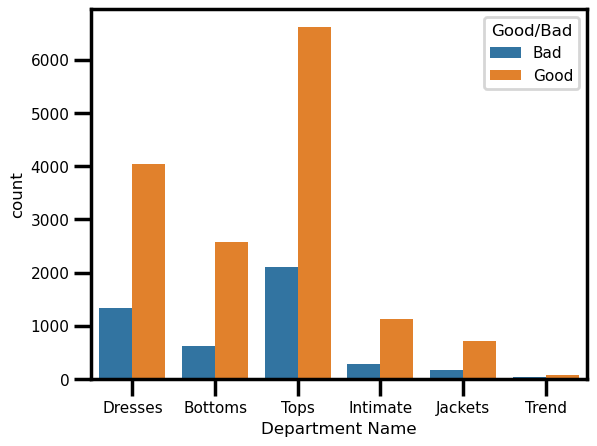

In [73]:
sns.countplot(x='Department Name',hue='Good/Bad',data=reviews)